In [29]:
print(__doc__)

#%matplotlib inline #way too small

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

Automatically created module for IPython interactive environment


In [30]:
#Generate datasets
n_samples = 1000
#large circle containing smaller circle
#(factor is scale factor between inner and outer circle)
noisy_circles = datasets.make_circles(n_samples = n_samples, factor = .5, noise = .05)
#double moon (classic)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise = .5)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=7)
no_structure = np.random.rand(n_samples,2), None#2d
swiss_roll = datasets.make_swiss_roll(n_samples = n_samples, random_state = 7)

In [31]:
#colors
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors]*20)#stack arrays horizontally

In [32]:
#clustering names
clustering_names = ['MiniBatchKMeans', 'AffinityPropagation', 'MeanShift', 'SpectralClustering', 'Ward', 'AgglomerativeClustering', 'DBSCAN', 'Birch']

In [33]:
plt.figure(figsize = (len(clustering_names)*2+3, 9.5))
plot_num=1

In [34]:
datasets = [noisy_circles, noisy_moons, blobs, no_structure, swiss_roll]
    

/home/kevin/anaconda3/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/kevin/anaconda3/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
/home/kevin/anaconda3/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
/home/kevin/anaconda3/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expec

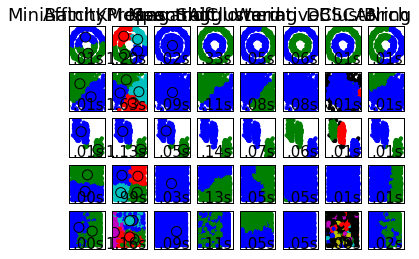

In [35]:
for i_dataset, dataset in enumerate(datasets):
    #print(dataset)#i_dataset = 0,1,2,3,4
    X,y = dataset
    #normalize
    X = StandardScaler().fit_transform(X)
    
    #estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=.3)
    
    #connectivity matrix for structured ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self = False)
    #make connectivity symmetric
    connectivity = .5*(connectivity + connectivity.T)
    
    #create clustering estimators
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means= cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward', connectivity = connectivity)
    #arpack for large sparse matrices
    spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity = "nearest_neighbors")
    
    dbscan=cluster.DBSCAN(eps=.2)#need to tune eps and minpts
    affinity_propagation = cluster.AffinityPropagation(damping=.9, preference=-200)
    
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2, connectivity = connectivity )
    
    birch = cluster.Birch(n_clusters=2)
    clustering_algorithms = [
        two_means, affinity_propagation, ms, spectral, ward, average_linkage, dbscan, birch]
    
    for name, algorithm in zip(clustering_names, clustering_algorithms):
        #predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
            
        #plot
        plt.subplot(5, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:,0], X[:,1], color=colors[y_pred].tolist(), s=10)
        
        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:,0], centers[:,1], s=100, c=center_colors)
        plt.xlim(-2,2)
        plt.ylim(-2,2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1-t0)).lstrip('0'),
                transform=plt.gca().transAxes, size=15,
                horizontalalignment='right')
        plot_num+=1
        
plt.show()

In [36]:
help(cluster.dbscan)

Help on function dbscan in module sklearn.cluster.dbscan_:

dbscan(X, eps=0.5, min_samples=5, metric='minkowski', algorithm='auto', leaf_size=30, p=2, sample_weight=None, n_jobs=1)
    Perform DBSCAN clustering from vector array or distance matrix.
    
    Read more in the :ref:`User Guide <dbscan>`.
    
    Parameters
    ----------
    X : array or sparse (CSR) matrix of shape (n_samples, n_features), or             array of shape (n_samples, n_samples)
        A feature array, or array of distances between samples if
        ``metric='precomputed'``.
    
    eps : float, optional
        The maximum distance between two samples for them to be considered
        as in the same neighborhood.
    
    min_samples : int, optional
        The number of samples (or total weight) in a neighborhood for a point
        to be considered as a core point. This includes the point itself.
    
    metric : string, or callable
        The metric to use when calculating distance between instance